In [ ]:
#Generate vector embedding using tokenizer

In [ ]:
import pandas as pd
import numpy as np
import string
from collections import Counter
from sklearn.model_selection import train_test_split
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
from google.colab import files
import io

In [ ]:
embedding_dim = 250
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .75

In [ ]:
uploaded = files.upload()

Saving test_features.csv to test_features.csv
Saving train_features.csv to train_features.csv
Saving train_labels.csv to train_labels.csv


In [ ]:
# turn a seq into clean tokens
def clean_seq(filename):
    seq_df = pd.read_csv(filename)
    sequences = seq_df['dna'].str.replace('[^ACGT]','N')
    for i in range(len(sequences)):
        sequences[i] = sequences[i].ljust(1058,'N')
    sequences_array = np.array(sequences)
    
    seq_list_truncated = []
    for i in range(len(sequences_array)):
        list_seq = list(sequences_array[i])
        del list_seq[658:]
        seq_list_truncated.append(''.join(list_seq))
    
    #print(np.array(seq_list_truncated).shape)
    
    token_list = []
    
    for i in range(len(seq_list_truncated)):
        List = [seq_list_truncated[i][m:m+4] for m in range(len(seq_list_truncated[i])-3)]
        token_list.append(List)
        
    return token_list

# load sequences and create token list
filename = "train_features.csv"
token_list = clean_seq(filename)

def load_labels(filename):
    df = pd.read_csv(filename)
    labels = df['labels']
    return labels

def generate_class_weights(class_series):
  # Compute class weights with sklearn method
  class_labels = np.unique(class_series)
  class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)

  return dict(zip(class_labels, class_weights))

#load labels
filename = 'train_labels.csv'
labels = load_labels(filename)
softmax_layer = len(set(labels))

In [ ]:
train_size = int(len(token_list) * training_portion)

train_seqs = token_list[:train_size]
train_labels = labels[:train_size]

validation_seqs = token_list[train_size:]
validation_labels = labels[train_size:]

In [ ]:
print(np.array(token_list).shape)

print("Number of Unique label Ids:", len(set(labels)))
print(train_size)
print(train_seqs[0])
print(train_seqs[1])
print(train_seqs[10])
print(len(train_labels))
print(len(validation_seqs))
print(len(validation_labels))

(12906, 655)
Number of Unique label Ids: 1202
9679
['AACA', 'ACAT', 'CATT', 'ATTA', 'TTAT', 'TATA', 'ATAC', 'TACT', 'ACTT', 'CTTT', 'TTTA', 'TTAT', 'TATT', 'ATTT', 'TTTT', 'TTTC', 'TTCG', 'TCGG', 'CGGA', 'GGAG', 'GAGC', 'AGCA', 'GCAT', 'CATG', 'ATGA', 'TGAT', 'GATC', 'ATCA', 'TCAG', 'CAGG', 'AGGA', 'GGAA', 'GAAT', 'AATA', 'ATAG', 'TAGT', 'AGTA', 'GTAG', 'TAGG', 'AGGA', 'GGAA', 'GAAC', 'AACT', 'ACTT', 'CTTC', 'TTCA', 'TCAT', 'CATT', 'ATTA', 'TTAA', 'TAAG', 'AAGT', 'AGTA', 'GTAT', 'TATA', 'ATAT', 'TATT', 'ATTA', 'TTAA', 'TAAT', 'AATT', 'ATTC', 'TTCG', 'TCGA', 'CGAG', 'GAGC', 'AGCT', 'GCTG', 'CTGA', 'TGAA', 'GAAC', 'AACT', 'ACTA', 'CTAG', 'TAGG', 'AGGA', 'GGAA', 'GAAA', 'AAAT', 'AATC', 'ATCC', 'TCCT', 'CCTG', 'CTGG', 'TGGA', 'GGAG', 'GAGC', 'AGCA', 'GCAT', 'CATT', 'ATTA', 'TTAA', 'TAAT', 'AATT', 'ATTG', 'TTGG', 'TGGA', 'GGAG', 'GAGA', 'AGAT', 'GATG', 'ATGA', 'TGAC', 'GACC', 'ACCA', 'CCAA', 'CAAA', 'AAAT', 'AATT', 'ATTT', 'TTTA', 'TTAT', 'TATA', 'ATAA', 'TAAT', 'AATG', 'ATGT', 'TGTA', 'GTA

In [ ]:
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(train_seqs)
word_index = tokenizer.word_index

vocab_size = len(word_index) + 1

train_sequences = tokenizer.texts_to_sequences(train_seqs)
train_padded = pad_sequences(train_sequences, padding=padding_type)

max_length = len(train_padded[0])

print(train_padded.shape)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

(9679, 655)
655
655
655
655
655
655


In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_seqs)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

3227
(3227, 655)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(labels)
label_seq = le.transform(labels)

train_label_list = label_seq[:train_size]

output = []
for v in label_seq:
    output.append([v])

print(output)
training_label_seq = np.array(output[:train_size])
validation_label_seq = np.array(output[train_size:])

[[31], [626], [1163], [30], [461], [450], [1164], [853], [626], [553], [780], [722], [643], [895], [44], [216], [364], [358], [1115], [1055], [384], [1012], [473], [372], [198], [858], [786], [248], [505], [220], [1085], [331], [647], [998], [1185], [714], [900], [152], [10], [614], [372], [370], [507], [321], [1099], [114], [213], [982], [15], [929], [734], [424], [540], [176], [226], [1161], [396], [550], [284], [680], [205], [586], [16], [462], [905], [372], [747], [1148], [641], [53], [822], [1035], [1054], [30], [673], [92], [1150], [461], [514], [959], [366], [444], [871], [848], [391], [1083], [4], [1176], [311], [881], [568], [513], [677], [11], [757], [1142], [997], [1166], [995], [747], [1162], [664], [32], [747], [643], [409], [734], [677], [67], [195], [599], [799], [416], [750], [877], [118], [793], [572], [532], [210], [555], [83], [617], [853], [479], [328], [693], [1200], [1200], [308], [584], [1150], [1172], [556], [468], [380], [524], [835], [686], [553], [809], [105]

In [ ]:
class_weights = generate_class_weights(train_label_list)
print(class_weights)
print(len(class_weights))

{0: 2.0147793505412155, 1: 1.6118234804329725, 2: 1.6118234804329725, 3: 0.8954574891294291, 4: 0.44772874456471456, 5: 4.029558701082431, 6: 1.151302486023552, 7: 0.20147793505412157, 8: 0.4241640737981507, 9: 1.151302486023552, 10: 1.0073896752706077, 11: 0.6199321078588356, 12: 1.3431862336941438, 13: 1.3431862336941438, 14: 1.0073896752706077, 15: 0.8059117402164863, 16: 2.0147793505412155, 17: 2.6863724673882876, 18: 2.0147793505412155, 19: 1.3431862336941438, 20: 1.151302486023552, 21: 2.0147793505412155, 22: 1.6118234804329725, 23: 0.8059117402164863, 24: 0.4740657295391096, 25: 0.6715931168470719, 26: 1.151302486023552, 27: 0.8954574891294291, 28: 2.0147793505412155, 29: 1.151302486023552, 30: 1.151302486023552, 31: 0.8954574891294291, 32: 0.38376749534118393, 33: 1.0073896752706077, 34: 1.151302486023552, 35: 1.0073896752706077, 36: 0.8954574891294291, 37: 2.0147793505412155, 38: 1.0073896752706077, 39: 0.732647036560442, 40: 1.6118234804329725, 41: 1.3431862336941438, 42: 0.7

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(softmax_layer, activation='softmax')
])

callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
        filepath="mymodel_{epoch}", save_weights_only=True,
        save_best_only = True, monitor = "val_loss", verbose =1,)]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 655, 250)          153000    
_________________________________________________________________
dropout_45 (Dropout)         (None, 655, 250)          0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 651, 32)           40032     
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 325, 32)           0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 325, 32)           128       
_________________________________________________________________
dropout_46 (Dropout)         (None, 325, 32)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 321, 64)          

In [ ]:
num_epochs = 20

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), callbacks=callbacks, verbose=2)

Epoch 1/20
303/303 - 5s - loss: 3.1361 - accuracy: 0.5955 - val_loss: 5.7580 - val_accuracy: 0.0040

Epoch 00001: val_loss improved from inf to 5.75801, saving model to mymodel_1
Epoch 2/20
303/303 - 4s - loss: 0.2719 - accuracy: 0.9651 - val_loss: 0.2470 - val_accuracy: 0.9603

Epoch 00002: val_loss improved from 5.75801 to 0.24704, saving model to mymodel_2
Epoch 3/20
303/303 - 3s - loss: 0.0825 - accuracy: 0.9873 - val_loss: 0.1933 - val_accuracy: 0.9681

Epoch 00003: val_loss improved from 0.24704 to 0.19327, saving model to mymodel_3
Epoch 4/20
303/303 - 3s - loss: 0.0610 - accuracy: 0.9905 - val_loss: 0.1767 - val_accuracy: 0.9703

Epoch 00004: val_loss improved from 0.19327 to 0.17670, saving model to mymodel_4
Epoch 5/20
303/303 - 3s - loss: 0.0458 - accuracy: 0.9929 - val_loss: 0.1867 - val_accuracy: 0.9699

Epoch 00005: val_loss did not improve from 0.17670
Epoch 6/20
303/303 - 3s - loss: 0.0474 - accuracy: 0.9926 - val_loss: 0.2157 - val_accuracy: 0.9672

Epoch 00006: val_lo

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(256, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(softmax_layer, activation='softmax')
])

callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
        filepath="mymodel_{epoch}", save_weights_only=True,
        save_best_only = True, monitor = "val_loss", verbose =1,)]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 655, 250)          153000    
_________________________________________________________________
dropout_40 (Dropout)         (None, 655, 250)          0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 651, 64)           80064     
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 325, 64)           0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 325, 64)           256       
_________________________________________________________________
dropout_41 (Dropout)         (None, 325, 64)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 321, 128)         

In [ ]:
num_epochs = 20

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), callbacks=callbacks, verbose=2)

Epoch 1/20
303/303 - 7s - loss: 2.7727 - accuracy: 0.6496 - val_loss: 5.3470 - val_accuracy: 0.0914

Epoch 00001: val_loss improved from inf to 5.34696, saving model to mymodel_1
Epoch 2/20
303/303 - 5s - loss: 0.2366 - accuracy: 0.9648 - val_loss: 0.2750 - val_accuracy: 0.9563

Epoch 00002: val_loss improved from 5.34696 to 0.27502, saving model to mymodel_2
Epoch 3/20
303/303 - 5s - loss: 0.0851 - accuracy: 0.9872 - val_loss: 0.2233 - val_accuracy: 0.9625

Epoch 00003: val_loss improved from 0.27502 to 0.22330, saving model to mymodel_3
Epoch 4/20
303/303 - 5s - loss: 0.0573 - accuracy: 0.9907 - val_loss: 0.2102 - val_accuracy: 0.9699

Epoch 00004: val_loss improved from 0.22330 to 0.21022, saving model to mymodel_4
Epoch 5/20
303/303 - 5s - loss: 0.0464 - accuracy: 0.9929 - val_loss: 0.1969 - val_accuracy: 0.9696

Epoch 00005: val_loss improved from 0.21022 to 0.19690, saving model to mymodel_5
Epoch 6/20
303/303 - 5s - loss: 0.0359 - accuracy: 0.9947 - val_loss: 0.1883 - val_accura

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(softmax_layer, activation='softmax')
])

callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
        filepath="mymodel_{epoch}", save_weights_only=True,
        save_best_only = True, monitor = "val_loss", verbose =1,)]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 655, 250)          153000    
_________________________________________________________________
dropout_30 (Dropout)         (None, 655, 250)          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 653, 16)           12016     
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 326, 16)           0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 326, 16)           64        
_________________________________________________________________
dropout_31 (Dropout)         (None, 326, 16)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 324, 32)          

In [ ]:
num_epochs = 20

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), callbacks=callbacks, verbose=2)

Epoch 1/20
303/303 - 4s - loss: 4.7464 - accuracy: 0.3716 - val_loss: 5.0119 - val_accuracy: 0.2135

Epoch 00001: val_loss improved from inf to 5.01191, saving model to mymodel_1
Epoch 2/20
303/303 - 2s - loss: 0.9863 - accuracy: 0.8965 - val_loss: 0.3817 - val_accuracy: 0.9411

Epoch 00002: val_loss improved from 5.01191 to 0.38175, saving model to mymodel_2
Epoch 3/20
303/303 - 3s - loss: 0.2127 - accuracy: 0.9734 - val_loss: 0.1786 - val_accuracy: 0.9690

Epoch 00003: val_loss improved from 0.38175 to 0.17861, saving model to mymodel_3
Epoch 4/20
303/303 - 3s - loss: 0.0872 - accuracy: 0.9872 - val_loss: 0.1905 - val_accuracy: 0.9647

Epoch 00004: val_loss did not improve from 0.17861
Epoch 5/20
303/303 - 3s - loss: 0.0500 - accuracy: 0.9916 - val_loss: 0.1962 - val_accuracy: 0.9699

Epoch 00005: val_loss did not improve from 0.17861
Epoch 6/20
303/303 - 3s - loss: 0.0395 - accuracy: 0.9932 - val_loss: 0.1677 - val_accuracy: 0.9721

Epoch 00006: val_loss improved from 0.17861 to 0.1

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(softmax_layer, activation='softmax')
])

callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
        filepath="mymodel_{epoch}", save_weights_only=True,
        save_best_only = True, monitor = "val_loss", verbose =1,)]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 747, 100)          61300     
_________________________________________________________________
dropout_15 (Dropout)         (None, 747, 100)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 743, 32)           16032     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 371, 32)           0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 371, 32)           128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 371, 32)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 367, 64)          

In [ ]:
num_epochs = 20

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), callbacks=callbacks, verbose=2)

Epoch 1/20
363/363 - 3s - loss: 0.0824 - accuracy: 0.9893 - val_loss: 0.1368 - val_accuracy: 0.9799

Epoch 00001: val_loss did not improve from 0.11280
Epoch 2/20
363/363 - 3s - loss: 0.0347 - accuracy: 0.9945 - val_loss: 0.1588 - val_accuracy: 0.9744

Epoch 00002: val_loss did not improve from 0.11280
Epoch 3/20
363/363 - 3s - loss: 0.0511 - accuracy: 0.9931 - val_loss: 0.1383 - val_accuracy: 0.9775

Epoch 00003: val_loss did not improve from 0.11280
Epoch 4/20
363/363 - 3s - loss: 0.0478 - accuracy: 0.9924 - val_loss: 0.2220 - val_accuracy: 0.9760

Epoch 00004: val_loss did not improve from 0.11280
Epoch 5/20
363/363 - 3s - loss: 0.0343 - accuracy: 0.9935 - val_loss: 0.1380 - val_accuracy: 0.9806

Epoch 00005: val_loss did not improve from 0.11280
Epoch 6/20
363/363 - 3s - loss: 0.0258 - accuracy: 0.9954 - val_loss: 0.1680 - val_accuracy: 0.9814

Epoch 00006: val_loss did not improve from 0.11280
Epoch 7/20
363/363 - 3s - loss: 0.0306 - accuracy: 0.9954 - val_loss: 0.1953 - val_accur

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(softmax_layer, activation='softmax')
])

callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
        filepath="mymodel_{epoch}", save_weights_only=True,
        save_best_only = True, monitor = "val_loss", verbose =1,)]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 747, 100)          61200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 747, 100)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 743, 32)           16032     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 371, 32)           0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 371, 32)           128       
_________________________________________________________________
dropout_11 (Dropout)         (None, 371, 32)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 367, 64)          

In [ ]:
num_epochs = 15

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), callbacks=callbacks, verbose=2)

Epoch 1/15
323/323 - 5s - loss: 3.1692 - accuracy: 0.5893 - val_loss: 5.4569 - val_accuracy: 0.0178

Epoch 00001: val_loss improved from inf to 5.45693, saving model to mymodel_1
Epoch 2/15
323/323 - 3s - loss: 0.2819 - accuracy: 0.9614 - val_loss: 0.2298 - val_accuracy: 0.9624

Epoch 00002: val_loss improved from 5.45693 to 0.22975, saving model to mymodel_2
Epoch 3/15
323/323 - 3s - loss: 0.0870 - accuracy: 0.9854 - val_loss: 0.2033 - val_accuracy: 0.9690

Epoch 00003: val_loss improved from 0.22975 to 0.20326, saving model to mymodel_3
Epoch 4/15
323/323 - 3s - loss: 0.0475 - accuracy: 0.9930 - val_loss: 0.1631 - val_accuracy: 0.9698

Epoch 00004: val_loss improved from 0.20326 to 0.16309, saving model to mymodel_4
Epoch 5/15
323/323 - 3s - loss: 0.0444 - accuracy: 0.9928 - val_loss: 0.1763 - val_accuracy: 0.9706

Epoch 00005: val_loss did not improve from 0.16309
Epoch 6/15
323/323 - 3s - loss: 0.0447 - accuracy: 0.9930 - val_loss: 0.2119 - val_accuracy: 0.9663

Epoch 00006: val_lo

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(16, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(softmax_layer, activation='softmax')
])

callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
        filepath="mymodel_{epoch}", save_weights_only=True,
        save_best_only = True, monitor = "val_loss", verbose =1,)]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 747, 100)          61200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 747, 100)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 743, 16)           8016      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 371, 16)           0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 371, 16)           64        
_________________________________________________________________
dropout_6 (Dropout)          (None, 371, 16)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 367, 32)          

In [ ]:
num_epochs = 15

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), callbacks=callbacks, verbose=2)

Epoch 1/15
323/323 - 5s - loss: 2.8225 - accuracy: 0.6097 - val_loss: 5.0084 - val_accuracy: 0.0678

Epoch 00001: val_loss improved from inf to 5.00842, saving model to mymodel_1
Epoch 2/15
323/323 - 3s - loss: 0.2175 - accuracy: 0.9630 - val_loss: 0.2585 - val_accuracy: 0.9613

Epoch 00002: val_loss improved from 5.00842 to 0.25852, saving model to mymodel_2
Epoch 3/15
323/323 - 3s - loss: 0.0940 - accuracy: 0.9859 - val_loss: 0.2581 - val_accuracy: 0.9682

Epoch 00003: val_loss improved from 0.25852 to 0.25812, saving model to mymodel_3
Epoch 4/15
323/323 - 3s - loss: 0.0790 - accuracy: 0.9894 - val_loss: 0.1893 - val_accuracy: 0.9710

Epoch 00004: val_loss improved from 0.25812 to 0.18933, saving model to mymodel_4
Epoch 5/15
323/323 - 3s - loss: 0.0447 - accuracy: 0.9943 - val_loss: 0.2049 - val_accuracy: 0.9741

Epoch 00005: val_loss did not improve from 0.18933
Epoch 6/15
323/323 - 3s - loss: 0.0399 - accuracy: 0.9946 - val_loss: 0.2500 - val_accuracy: 0.9706

Epoch 00006: val_lo

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(softmax_layer, activation='softmax')
])

callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
        filepath="mymodel_{epoch}", save_weights_only=True,
        save_best_only = True, monitor = "val_loss", verbose =1,)]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 747, 100)          61200     
_________________________________________________________________
dropout (Dropout)            (None, 747, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 745, 16)           4816      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 372, 16)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 372, 16)           64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 372, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 370, 32)           1

In [ ]:
num_epochs = 15

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), callbacks=callbacks, verbose=2)

Epoch 1/100
323/323 - 22s - loss: 2.7219 - accuracy: 0.6278 - val_loss: 4.7617 - val_accuracy: 0.0387

Epoch 00001: val_loss improved from inf to 4.76172, saving model to mymodel_1
Epoch 2/100
323/323 - 2s - loss: 0.2032 - accuracy: 0.9663 - val_loss: 0.2596 - val_accuracy: 0.9578

Epoch 00002: val_loss improved from 4.76172 to 0.25958, saving model to mymodel_2
Epoch 3/100
323/323 - 3s - loss: 0.0809 - accuracy: 0.9865 - val_loss: 0.2007 - val_accuracy: 0.9694

Epoch 00003: val_loss improved from 0.25958 to 0.20075, saving model to mymodel_3
Epoch 4/100
323/323 - 2s - loss: 0.0611 - accuracy: 0.9899 - val_loss: 0.2570 - val_accuracy: 0.9694

Epoch 00004: val_loss did not improve from 0.20075
Epoch 5/100
323/323 - 3s - loss: 0.0667 - accuracy: 0.9920 - val_loss: 0.2426 - val_accuracy: 0.9741

Epoch 00005: val_loss did not improve from 0.20075
Epoch 6/100
323/323 - 2s - loss: 0.0524 - accuracy: 0.9932 - val_loss: 0.1796 - val_accuracy: 0.9737

Epoch 00006: val_loss improved from 0.20075

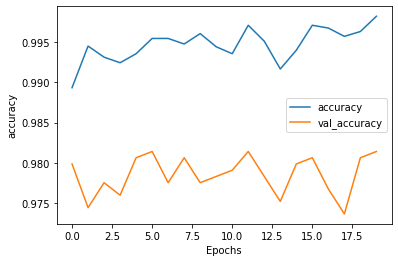

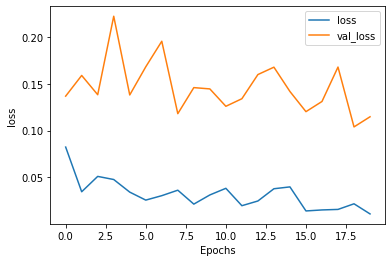

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
## Test prediction

In [ ]:
model.load_weights("mymodel_7")

In [ ]:
filename_features_test = 'test_features.csv'
test_seqs = clean_seq(filename_features_test)
test_sequences = tokenizer.texts_to_sequences(test_seqs)

predictions = np.argmax(model.predict(test_sequences), axis=1)
print(predictions)

def decode_labels(encoded_predict_labels, le):
    test_predictions = le.inverse_transform(encoded_predict_labels)
    
    return test_predictions

test_seq_predictions = decode_labels(predictions, le)
print(test_seq_predictions)

[ 659    7  200 ...  823 1059  590]
[ 667    8  205 ...  833 1071  597]


In [ ]:
def get_seq_ids(filename):
    df = pd.read_csv(filename)
    ids = df['id']
    
    return np.array(ids)

test_ids = get_seq_ids(filename_features_test)

frames = [pd.DataFrame(test_ids), pd.DataFrame(test_seq_predictions)]
output_data= np.concatenate(frames, axis=1)
output_df = pd.DataFrame(output_data)
output_df.to_csv('dna_barcode_seq_submission_embedding_cnn.csv', index=False,  header=["id","labels"])

In [ ]:
files.download("dna_barcode_seq_submission_embedding_cnn.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()

Saving outliers_threshold_110_mahalanobis_distance_from_vae_embedding.csv to outliers_threshold_110_mahalanobis_distance_from_vae_embedding.csv


In [ ]:
outlier_df = pd.read_csv('outliers_threshold_110_mahalanobis_distance_from_vae_embedding.csv')
outlier_ids = outlier_df['labels']
test_final_predictions = test_seq_predictions

for i in range(len(outlier_ids)):
  if outlier_ids[i] > 0:
    test_final_predictions[i] = -1

print(len(test_final_predictions))

8306


In [ ]:
test_final_predictions = test_final_predictions.astype(int)
print(test_final_predictions)
test_ids = test_ids.astype(int)
print(test_ids)

[ 667    8  205 ...  833 1071  597]
[   1    2    3 ... 8304 8305 8306]


In [ ]:
def get_seq_ids(filename):
    df = pd.read_csv(filename)
    ids = df['id']
    
    return np.array(ids)

frames = [pd.DataFrame(test_ids), pd.DataFrame(test_final_predictions)]
output_data= np.concatenate(frames, axis=1)
output_df = pd.DataFrame(output_data)
output_df.to_csv('dna_barcode_seq_submission_embedding_cnn_mahalanobis_distance.csv', index=False,  header=["id","labels"])

In [ ]:
from google.colab import files
files.download("dna_barcode_seq_submission_embedding_cnn_mahalanobis_distance.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>